In [1]:

from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.estimators import K2Score, BicScore, MLE
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import pandas as pd
import torch
import pyro
import itertools
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wwymak/anaconda3/envs/immo-ml/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


reconstruct graph

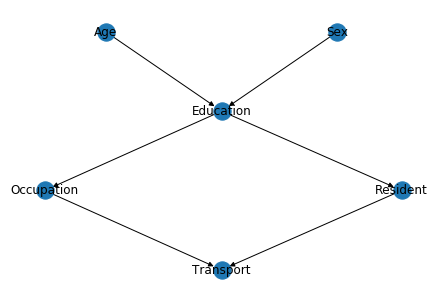

In [2]:
transport_model = BayesianModel([('Age', 'Education'), 
                                 ('Sex', 'Education'),
                                 ('Education', 'Occupation'),
                                 ('Education', 'Resident'),
                                 ('Occupation', 'Transport'),
                                 ('Resident', 'Transport')
                                ])

nx.draw(transport_model, nx.nx_pydot.graphviz_layout(transport_model, prog='dot'), with_labels=True)


In [3]:
data = pd.read_csv('survey.txt', sep=" ")
data = data.rename(columns={"A": "Age", "R": "Resident", "E": "Education",  "O":"Occupation",
                            "S": "Sex", "T" :"Transport"})

transport_model = BayesianModel([('Age', 'Education'), 
                                 ('Sex', 'Education'),
                                 ('Education', 'Occupation'),
                                 ('Education', 'Resident'),
                                 ('Occupation', 'Transport'),
                                 ('Resident', 'Transport')
                                ])
transport_model.fit(data, estimator=BayesianEstimator)

pgmpy already has a d-separation calculation out of the box that does all the comparisons for us:

In [4]:
transport_model.get_independencies()

(Age _|_ Sex)
(Age _|_ Resident, Occupation, Transport | Education)
(Age _|_ Occupation, Transport | Education, Resident)
(Age _|_ Transport | Resident, Occupation)
(Age _|_ Resident, Transport | Education, Occupation)
(Age _|_ Resident, Occupation, Transport | Education, Sex)
(Age _|_ Resident, Occupation | Education, Transport)
(Age _|_ Transport | Education, Resident, Occupation)
(Age _|_ Occupation, Transport | Education, Resident, Sex)
(Age _|_ Occupation | Education, Resident, Transport)
(Age _|_ Transport | Resident, Occupation, Sex)
(Age _|_ Resident, Transport | Education, Occupation, Sex)
(Age _|_ Resident | Education, Occupation, Transport)
(Age _|_ Resident, Occupation | Education, Sex, Transport)
(Age _|_ Transport | Education, Resident, Occupation, Sex)
(Age _|_ Occupation | Education, Resident, Sex, Transport)
(Age _|_ Resident | Education, Transport, Occupation, Sex)
(Education _|_ Transport | Resident, Occupation)
(Education _|_ Transport | Resident, Occupation, Sex)
(

Redundant statements: 
- (Age _|_ Resident | Education, Transport, Occupation, Sex) -> (Resident _|_ Age | Education, Transport, Occupation, Sex)
- (Transport _|_ Age | Education, Resident, Sex) -> (Age _|_ Transport | Resident, Occupation, Sex)

These are examples of redundant statements since swapping the order in which you state the 2 independent nodes should not have any effect on the independence. E.g in the 1st statement, age is d-separated from resident given education, transport, occupation and sex vs resident is d-separated from age given education, transport, occupation and sex are exactly identical statements

In [ ]:
for node1 in transport_model.nodes():
    node_others  = set(transport_model.nodes()) - {node1}
    print(node1, node_others)
    

for start in self.nodes():
            rest = set(self.nodes()) - {start}
            for r in range(len(rest)):
                for observed in itertools.combinations(rest, r):
                    d_seperated_variables = (
                        rest
                        - set(observed)
                        - set(self.active_trail_nodes(start, observed=observed)[start])
                    )
                    if d_seperated_variables:
                        independencies.add_assertions(
                            [start, d_seperated_variables, observed]
                        )


(Occupation _|_ Resident, Sex, Age | Education) means occupations is independent of sex, age, and whehter the person lives in a big city if we know his/her education level

#### Q3

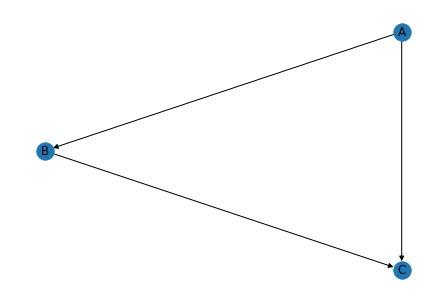

In [2]:
model = BayesianModel([
    ('A', 'B'), 
     ('A', 'C'),
     ('B', 'C')
    ])
nombres = ["off", "on"]
cpt_a = TabularCPD('A', 2, [0.5,0.5])
cpt_b = TabularCPD('B', 4, [.8, .2, .1, .9])
nx.draw(model, nx.nx_pydot.graphviz_layout(model, prog='dot'), with_labels=True)

In [4]:
np.array([[0.1,0.1,0.1,0.1,0.1,0.1],
                                [0.1,0.1,0.1,0.1,0.1,0.1],
                                [0.8,0.8,0.8,0.8,0.8,0.8]]).shape

(3, 6)

In [4]:
import numpy as np
C = np.array([.9, .1, .99, .01, .1, .9, .4, .6]).reshape(2,2,2)
C[1]

array([[0.1, 0.9],
       [0.4, 0.6]])